In [1]:
import pandas as pd
import numpy as np
from scipy.stats.contingency import odds_ratio
import forestplot as fp
from scipy.stats import fisher_exact

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight',dpi=300)
    pdf.close()
    return

In [3]:
train_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/british/train_cohort.csv")

In [4]:
bmi_df = pd.read_csv("/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/british/train_cohort_bmi.csv.gz")
bmi_df.sample_names = bmi_df.sample_names.astype(str)

In [5]:
combo_samples = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/british/train_cohort.csv")
combo_samples = set("|".join(combo_samples.combo_samples).split("|"))

In [6]:
bmi_df["Carriers"] = bmi_df.sample_names.isin(combo_samples)

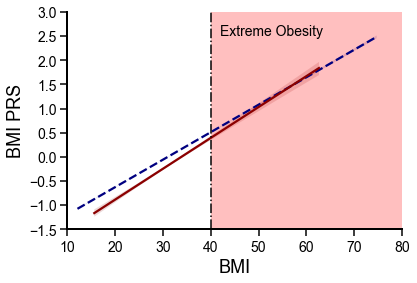

In [7]:
fig, axes = plt.subplots(figsize=(6,4))

sns.regplot(
    bmi_df.loc[bmi_df.Carriers==False], x="bmi", y="bmi_prs", scatter=False, 
    line_kws={"ls": "--", "color":"navy"}, ax=axes)
sns.regplot(
    bmi_df.loc[bmi_df.Carriers==True], x="bmi", y="bmi_prs", scatter=False, 
    line_kws={"ls": "-", "color":"darkred"}, ax=axes, ci=99)

axes.set_xlabel("BMI", fontsize=18)
axes.set_ylabel("BMI PRS", fontsize=18)

axes.set_xlim(10, 80, auto=False)
axes.set_ylim(-1.5, 3, auto=False)

axes.vlines(40, -1.5, 3, linestyles=["dashdot"], color="k")
axes.axvspan(40, 80, alpha=0.25, facecolor="red")
axes.text(42, 2.75, f"Extreme Obesity", ha="left", va="top", fontsize=14)

axes.set_xticklabels(axes.get_xticklabels(), fontsize=14)
axes.set_yticklabels(axes.get_yticklabels(), fontsize=14)

# Remove Spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

In [8]:
save_pdf("../data/combos_in_cohort/british/figures/bmi_vs_prs.pdf", fig)